In [1]:
import pandas as pd
import numpy as np
π = np.pi

from scipy.optimize import curve_fit

import datetime

from matplotlib import pyplot as plt
# plt.style.use('dark_background')

load data file

In [2]:
data = pd.read_csv('data.csv')
data['Time'] = pd.to_datetime(data['Time'])

plot temperature

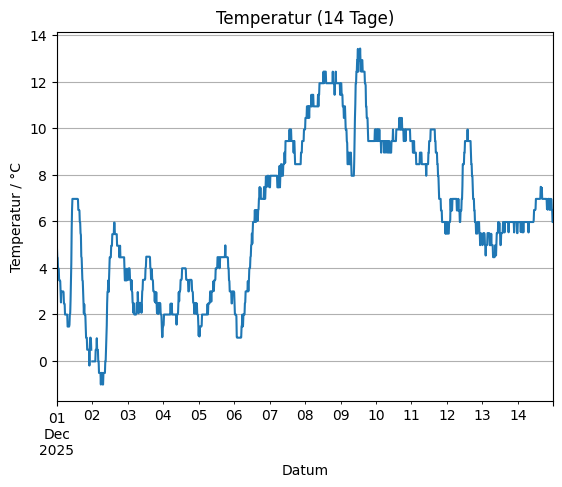

In [3]:
data.iloc[-14*96:].plot(
    x='Time', y='Temperature / C',
    xlabel='Datum',
    ylabel='Temperatur / °C', 
    title=f'Temperatur (14 Tage)',
    legend=False,
    grid=True
)
plt.show()

C:\Users\gerri\AppData\Local\Temp\ipykernel_6440\631339962.py:23: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(data['Time'], sine(data['Seconds'], *params), 'r--', linewidth=.5)


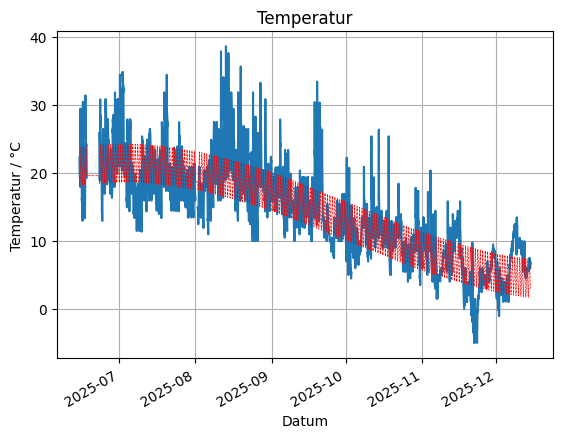

array([ 8.66332993, -2.83726208, 12.73690508,  1.25847141,  0.63595641])

In [4]:
# %matplotlib qt
data.plot(
    x='Time', y='Temperature / C',
    xlabel='Datum',
    ylabel='Temperatur / °C', 
    title=f'Temperatur',
    legend=False,
    grid=True
)

data.dropna(inplace=True, axis=0)

data['Seconds'] = (data['Time']-data['Time'].iloc[0]).dt.total_seconds()


def sine(x, Ay, Ad, Tavg, φy, φd):
    return Ay * np.sin(2 * π / (365 * 24 * 60 * 60) * x + φy) + \
           Ad * np.sin(2 * π / (24 * 60 * 60      ) * x + φd) + Tavg

params, _ = curve_fit(sine, data['Seconds'], data['Temperature / C'])


plt.plot(data['Time'], sine(data['Seconds'], *params), 'r--', linewidth=.5)
plt.show()

params

statistics

In [5]:
stats = data.copy()

stats['Time'] = stats['Time'].dt.time

stats = stats.groupby('Time').agg(['min','median','max'])

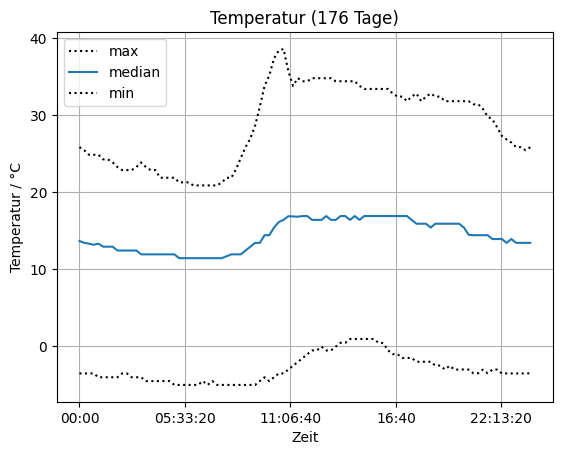

In [6]:
stats['Temperature / C'].plot(
    y=['max', 'median', 'min'],
    style=['k:', '-', 'k:'],
    title=f'Temperatur ({int(len(data)/96)} Tage)',
    ylabel='Temperatur / °C',
    xlabel='Zeit',
    grid=True
)
plt.show()

plot power

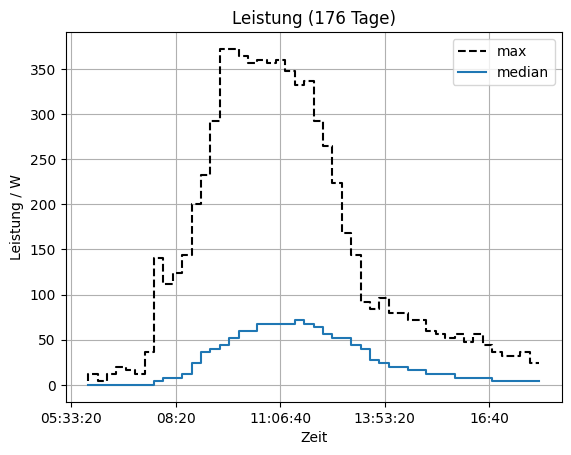

In [7]:
start_time = datetime.time(6, 0)
end_time   = datetime.time(18, 0)

filtered_stats = stats[stats.index.to_series().between(start_time, end_time)]

filtered_stats['Power / W'].plot(
    y=['max', 'median',],
    style=['k--', '-'],
    drawstyle='steps-pre',
    title=f'Leistung ({int(len(data)/96)} Tage)',
    ylabel='Leistung / W',
    xlabel='Zeit',
    grid=True
)
plt.show()

plot energy

In [8]:
energy = data.copy()

energy['Time'] = energy['Time'].dt.date

energy = energy.groupby('Time').agg('sum')

energy = energy['Power / W'] * 0.25 / 1e3  # convert to kWh

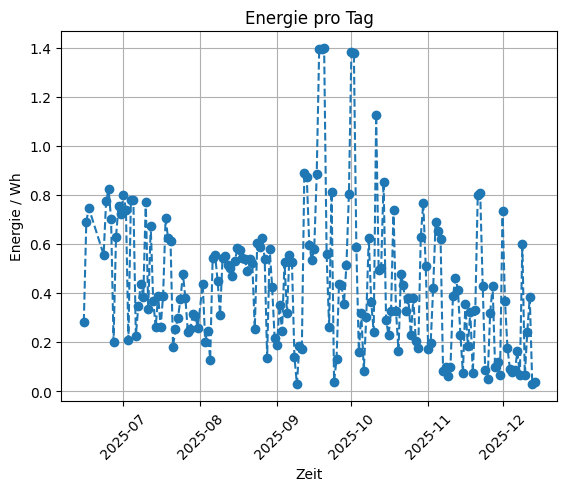

In [9]:
energy.plot(style = 'o--', title='Energie pro Tag', ylabel='Energie / Wh', xlabel='Zeit', rot=45, grid=True)
plt.show()